In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
batting_stats = pd.read_csv(r"C:\Users\Rohan\OneDrive\Desktop\Rohan\T20 Int Matches\Batting_Stats.csv")
batting_stats.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Runs in Boundary,% Runs in Boundary
0,V Kohli (IND),2010-2024,117,109,31,4037,122*,51.75,2922,138.15,1,37,5,361,117,2146,53.158286
1,RG Sharma (IND),2007-2024,151,143,18,3974,121*,31.79,2839,139.97,5,29,12,359,190,2576,64.821339
2,Babar Azam (PAK),2016-2024,109,103,14,3698,122,41.55,2864,129.12,3,33,5,395,59,1934,52.298540
3,MJ Guptill (NZ),2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173,2274,64.401020
4,PR Stirling (IRE),2009-2024,137,136,11,3491,115*,27.92,2582,135.20,1,23,13,407,124,2372,67.946147


In [4]:
print("\nSummary Statistics of Batting Stats Data:")
print(batting_stats.describe())


Summary Statistics of Batting Stats Data:
             Inns         Runs         Ave           BF          SR  \
count  150.000000   150.000000  150.000000   150.000000  150.000000   
mean    66.606667  1605.580000   28.662333  1229.100000  130.893200   
std     21.418457   614.019219    6.252672   448.860866   13.248173   
min     31.000000   987.000000   17.390000   600.000000  101.150000   
25%     52.000000  1175.250000   24.212500   913.500000  121.210000   
50%     63.000000  1457.000000   27.995000  1118.000000  130.920000   
75%     76.750000  1817.750000   31.805000  1380.500000  138.492500   
max    143.000000  4037.000000   51.750000  2922.000000  171.550000   

               50          4s          6s  Runs in Boundary  \
count  150.000000  150.000000  150.000000        150.000000   
mean     9.233333  143.540000   62.340000        948.200000   
std      5.733941   64.143467   31.028852        386.965045   
min      2.000000   68.000000   14.000000        472.000000   
25

In [6]:
print("\nMissing Values in Batting Stats Data:")
print(batting_stats.isnull().sum())


Missing Values in Batting Stats Data:
Player                0
Span                  0
Mat                   0
Inns                  0
NO                    0
Runs                  0
HS                    0
Ave                   0
BF                    0
SR                    0
100                   0
50                    0
0                     0
4s                    0
6s                    0
Runs in Boundary      0
% Runs in Boundary    0
dtype: int64


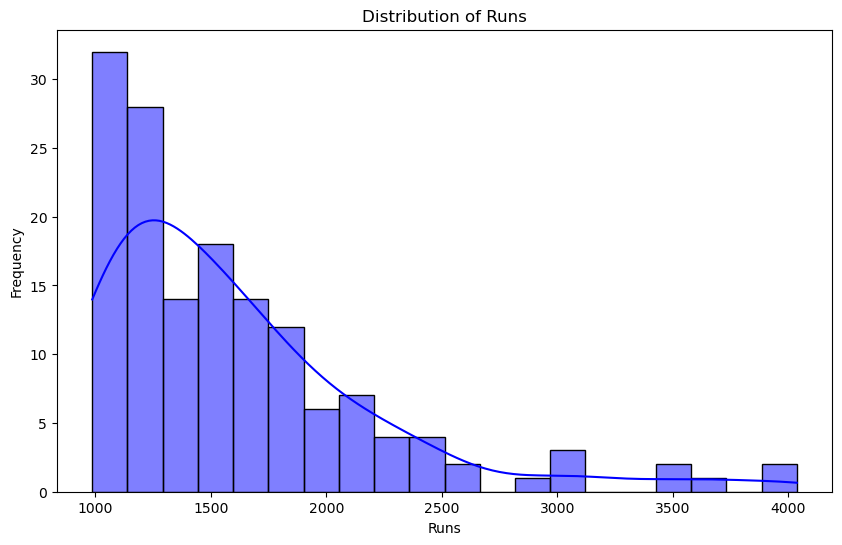

In [7]:
# Distribution of Runs
plt.figure(figsize=(10, 6))
sns.histplot(batting_stats['Runs'], bins=20, kde=True, color='blue')
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

**TOP 5 PLAYERS WITH MOST STRIKE RATE IN T20I MATCH**

In [17]:
# Sort the DataFrame by 'SR' (Strike Rate) in descending order
sorted_df = batting_stats[batting_stats['Runs']>2000].sort_values(by='SR', ascending=False)

# Select the top 5 players
top_5_players = sorted_df.head(5)

# Display the top 5 players with highest strike rates
top_5_players[['Player', 'Runs', 'SR']]

,Player,Runs,SR
21,SA Yadav (IND),2141,171.55
11,GJ Maxwell (AUS),2468,155.51
8,JC Buttler (ENG),2927,144.61
17,DA Miller (SA/World),2268,144.55
6,DA Warner (AUS),3099,142.67


**TOP 5 PLAYERS WITH MORE THAN 2000 RUNS AND HIGHEST SR**

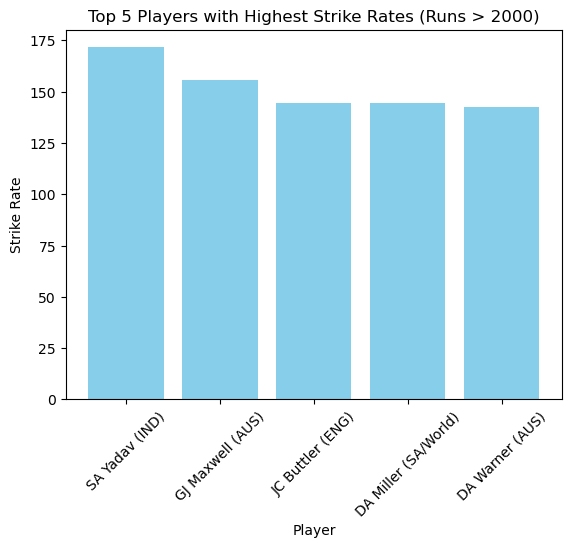

In [51]:
# Plot a bar chart for the top 5 players
plt.bar(top_5_players['Player'], top_5_players['SR'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.title('Top 5 Players with Highest Strike Rates (Runs > 2000)')
plt.xticks(rotation=45)
plt.show()

**TOP 5 PLAYERS WITH MOST RUNS IN BOUNDARY (PERCENTAGE)**

In [34]:
# Sorting the DataFrame by 'Runs' in descending order to get the top 5 highest runs scorers
top_5_scorers = batting_stats.sort_values(by='Runs', ascending=False).head(5)

# Calculating the percentage of runs scored in boundary for each player
top_5_scorers['Percentage Runs in Boundary'] = (top_5_scorers['Runs in Boundary'] / top_5_scorers['Runs']) * 100

# Displaying the top 5 highest runs scorers and their corresponding percentage of runs in boundary
top_5_scorers[['Player', 'Runs', 'Percentage Runs in Boundary']]

,Player,Runs,Percentage Runs in Boundary
0,V Kohli (IND),4037,53.158286
1,RG Sharma (IND),3974,64.821339
2,Babar Azam (PAK),3698,52.298540
3,MJ Guptill (NZ),3531,64.401020
4,PR Stirling (IRE),3491,67.946147


**TOP 5 HIGHEST RUN SCORERS IN T20I MATCHES BASED ON THE RUNS SCORED IN BOUNDARIES**

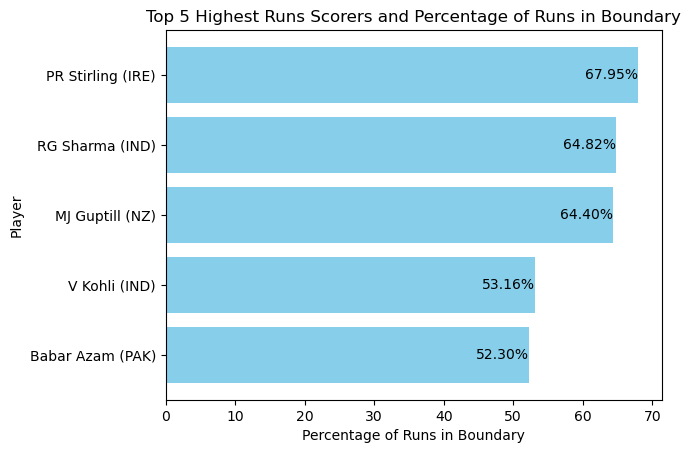

In [79]:
# Sorting the players and their corresponding percentage of runs in boundary in descending order
sorted_players, sorted_runs_in_boundary = zip(*sorted(zip(players, runs_in_boundary), key=lambda x: x[1], reverse=False))

# Plot a horizontal bar chart for the sorted data
bars = plt.barh(sorted_players, sorted_runs_in_boundary, color='skyblue')
plt.xlabel('Percentage of Runs in Boundary')
plt.ylabel('Player')
plt.title('Top 5 Highest Runs Scorers and Percentage of Runs in Boundary')

# Add exact percentage values on top of each bar
for bar, percentage in zip(bars, sorted_runs_in_boundary):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', 
             va='center', ha='right', fontsize=10, color='black')
plt.show()

**SCATTER PLOT B/W RUNS AND BATTING AVERAGE**

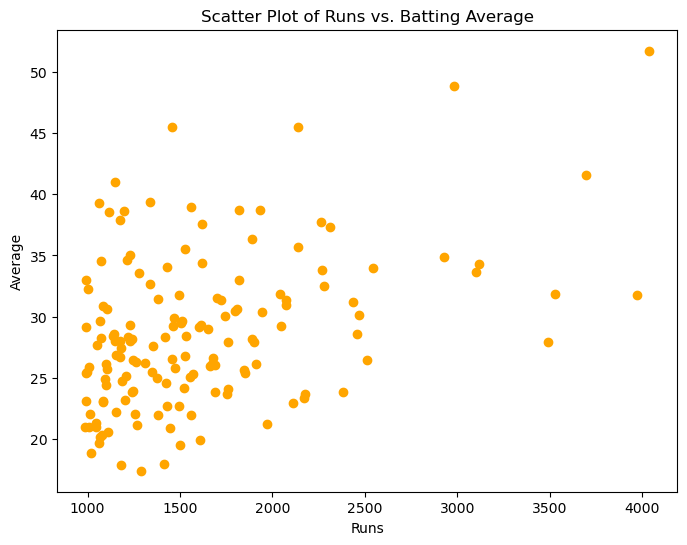

In [71]:
# Scatter Plot for Runs vs. Average
plt.figure(figsize=(8, 6))
plt.scatter(batting_stats['Runs'], batting_stats['Ave'], color='orange')
plt.xlabel('Runs')
plt.ylabel('Average')
plt.title('Scatter Plot of Runs vs. Batting Average')
plt.show()

**TOP 5 PLAYERS OF EACH COUNTRY WITH HIGHEST RUNS**

In [75]:
# Extract country from the 'Player' column
batting_stats['Country'] = batting_stats['Player'].str.extract(r'\((.*?)\)')

# Grouping the data by country and sorting the runs within each group
top_batsmen_by_country = batting_stats.groupby('Country').apply(lambda x: x.nlargest(5, 'Runs')).reset_index(drop=True)
top_batsmen_by_country[['Player', 'Runs', 'Country']]

,Player,Runs,Country
0,Mohammad Nabi (AFG),2109,AFG
1,Mohammad Shahzad (AFG),2048,AFG
2,Najibullah Zadran (AFG),1808,AFG
3,Asghar Afghan (AFG),1382,AFG
4,Rahmanullah Gurbaz (AFG),1376,AFG
...,...,...,...
111,Sikandar Raza (ZIM),1854,ZIM
112,SC Williams (ZIM),1691,ZIM
113,H Masakadza (ZIM),1662,ZIM
114,CR Ervine (ZIM),1429,ZIM


 **TOP 5 INDIAN BATSMEN WITH MOST RUNS IN T20I MATCHES**

In [76]:
# Filtering the DataFrame for rows where the country is "IND" (India)
indian_batsmen = batting_stats[batting_stats['Country'] == 'IND']

# Sorting the runs in descending order to find the top 5 batsmen for India
top_5_indian_batsmen = indian_batsmen.nlargest(5, 'Runs')
top_5_indian_batsmen[['Player', 'Runs', 'Country']]

,Player,Runs,Country
0,V Kohli (IND),4037,IND
1,RG Sharma (IND),3974,IND
18,KL Rahul (IND),2265,IND
21,SA Yadav (IND),2141,IND
41,S Dhawan (IND),1759,IND


**MOST CENTURIES SCORED BY A COUNTRY IN T20 INTERNATION MATCHES**

In [86]:
# Converting the '100' column to numeric type
batting_stats['100'] = pd.to_numeric(batting_stats['100'], errors='coerce')

# Grouping the dataset by 'Country' and sum the centuries scored by each player
centuries_by_country = batting_stats.groupby('Country')['100'].sum()

# Find the country with the maximum centuries scored
most_centuries_country = centuries_by_country.idxmax()
most_centuries = centuries_by_country.max()

# Display the country with the most centuries and the number of centuries
print(f"Country with the most centuries: {most_centuries_country}")
print(f"Number of centuries: {most_centuries}")

Country with the most centuries: IND
Number of centuries: 13.0


**BREAKDOWN OF MOST CENTURIES IN T20I MATCHES BY INDIAN PLAYERS**

In [95]:
# Filter the dataset for players from India
indian_players = batting_stats[batting_stats['Country'] == 'IND']

# Group the dataset by player and count the number of centuries scored by each player
centuries_by_player = indian_players.groupby('Player')['100'].sum().reset_index()
centuries_by_player.sort_values(by='100',ascending=False)

,Player,100
3,RG Sharma (IND),5.0
5,SA Yadav (IND),4.0
1,KL Rahul (IND),2.0
6,SK Raina (IND),1.0
8,V Kohli (IND),1.0
0,HH Pandya (IND),0.0
2,MS Dhoni (IND),0.0
4,S Dhawan (IND),0.0
7,SS Iyer (IND),0.0
9,Yuvraj Singh (IND),0.0


**MOST NUMBER OF 50s BY BATTERS ACROSS T20I FORMAT**

In [120]:
# Group the dataset by country and find the player with the maximum number of 50s in each group
batsmen_with_most_50s = batting_stats.loc[batting_stats.groupby('Country')['50'].idxmax()]
batsmen_with_most_50s[['Player', 'Country', '50']].sort_values(by='50',ascending=False).head(10)

,Player,Country,50
0,V Kohli (IND),IND,37
2,Babar Azam (PAK),PAK,33
6,DA Warner (AUS),AUS,26
4,PR Stirling (IRE),IRE,23
8,JC Buttler (ENG),ENG,22
3,MJ Guptill (NZ),NZ,20
25,S Ssesazi (UGA),UGA,16
15,Virandeep Singh (MAS),MAS,16
32,CH Gayle (WI),WI,14
37,Muhammad Waseem (UAE),UAE,14


**DISPLAYING CAREER SPAN OF THE BATSMEN**

In [131]:
def display_career_stats(player_name):
    # Check if the player exists in the dataset
    if player_name in batting_stats['Player'].values:
        # Retrieve player's data
        player_data = batting_stats[batting_stats['Player'] == player_name].iloc[0]

        # Print career statistics
        print(f"Player: {player_data['Player']}")
        print(f"Career Span: {player_data['Span']}")
        print(f"Matches Played: {player_data['Mat']}")
        print(f"Total Runs: {player_data['Runs']}")
        print(f"Highest Score: {player_data['HS']}")
        print(f"Strike Rate: {player_data['SR']}")
        print(f"Batting Average: {player_data['Ave']}")
    else:
        print("Player not found in the dataset")

# Take input from the user for player's name
player_name = input("Enter the player's name: ")

# Display career statistics for the selected palayer
display_career_stats(player_name)

Enter the player's name: RG Sharma (IND)
Player: RG Sharma (IND)
Career Span: 2007-2024
Matches Played: 151
Total Runs: 3974
Highest Score: 121*
Strike Rate: 139.97
Batting Average: 31.79
